In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as grid_spec
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
# from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# from category_encoders import OneHotEncoder, GLMMEncoder, MEstimateEncoder, CatBoostEncoder
# from sklearn import set_config
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.ensemble import RandomForestRegressor, IsolationForest
# from sklearn.metrics import roc_auc_score, roc_curve, make_scorer, log_loss
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
# from sklearn.metrics.pairwise import euclidean_distances
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.base import BaseEstimator, TransformerMixin, clone
# from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, LabelEncoder, PowerTransformer
# from sklearn.compose import ColumnTransformer
# from sklearn.linear_model import LogisticRegression, RidgeClassifier
# from sklearn.naive_bayes import GaussianNB, BernoulliNB
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.ensemble import VotingClassifier, StackingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.gaussian_process import GaussianProcessClassifier
# from scipy.cluster.hierarchy import dendrogram, linkage
# from scipy.spatial.distance import squareform
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

pd.set_option('display.max_rows', 100)
# set_config(transform_output = 'pandas')
pd.options.mode.chained_assignment = None

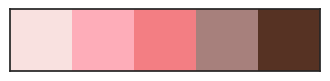

In [46]:
#Custom Color Palette 🎨
custom_colors = ["#F9E1E0","#FEADB9","#F37E83","#A7807C","#563223"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=0.8)
plt.tick_params(axis='both', labelsize=0, length = 0)
custom_cmap = colors.LinearSegmentedColormap.from_list("custom", custom_colors)

In [47]:
train_df = pd.read_csv("dataset/train.csv")

In [48]:
test_df = pd.read_csv("dataset/test.csv")

In [49]:
train_df.isna().sum()


id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [50]:
test_df.isna().sum()


id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [51]:
train_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [52]:
test_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


# Missing values

In [53]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

None

In [54]:
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

None

In [55]:
desc = pd.DataFrame(index = list(train_df))


In [56]:
desc['type'] = train_df.dtypes
desc['count'] = train_df.count()
desc['nunique'] = train_df.nunique()
desc['%unique'] = desc['nunique'] / len(train_df) * 100
desc['null'] = train_df.isnull().sum()
desc['%null'] = desc['null'] / len(train_df) * 100
desc['min'] = train_df.min()
desc['max'] = train_df.max()
desc

,type,count,nunique,%unique,null,%null,min,max
id,int64,7905,7905,100.000000,0,0.0,0,7904
N_Days,int64,7905,461,5.831752,0,0.0,41,4795
Drug,object,7905,2,0.025300,0,0.0,D-penicillamine,Placebo
Age,int64,7905,391,4.946237,0,0.0,9598,28650
Sex,object,7905,2,0.025300,0,0.0,F,M
Ascites,object,7905,2,0.025300,0,0.0,N,Y
Hepatomegaly,object,7905,2,0.025300,0,0.0,N,Y
Spiders,object,7905,2,0.025300,0,0.0,N,Y
Edema,object,7905,3,0.037951,0,0.0,N,Y
Bilirubin,float64,7905,111,1.404175,0,0.0,0.3,28.0


In [57]:
desc = pd.DataFrame(index = list(test_df))
desc['type'] = test_df.dtypes
desc['count'] = test_df.count()
desc['nunique'] = test_df.nunique()
desc['%unique'] = desc['nunique'] / len(test_df) * 100
desc['null'] = test_df.isnull().sum()
desc['%null'] = desc['null'] / len(test_df) * 100
desc['min'] = test_df.min()
desc['max'] = test_df.max()
desc

,type,count,nunique,%unique,null,%null,min,max
id,int64,5271,5271,100.000000,0,0.0,7905,13175
N_Days,int64,5271,409,7.759438,0,0.0,41,4795
Drug,object,5271,2,0.037943,0,0.0,D-penicillamine,Placebo
Age,int64,5271,363,6.886739,0,0.0,9598,28650
Sex,object,5271,2,0.037943,0,0.0,F,M
Ascites,object,5271,2,0.037943,0,0.0,N,Y
Hepatomegaly,object,5271,2,0.037943,0,0.0,N,Y
Spiders,object,5271,2,0.037943,0,0.0,N,Y
Edema,object,5271,3,0.056915,0,0.0,N,Y
Bilirubin,float64,5271,108,2.048947,0,0.0,0.3,28.0


In [58]:
train_df.drop(columns=["id"],inplace=True)
test_df.drop(columns=["id"],inplace=True)

Count of each Status:
Status
C     4965
D     2665
CL     275
Name: count, dtype: int64



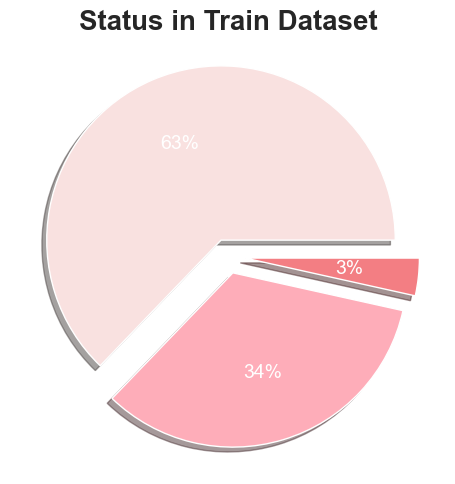

In [59]:
status_counts = train_df['Status'].value_counts()
print("Count of each Status:")
print(status_counts)
print()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    train_df['Status'].value_counts(), 
    shadow=True, 
    explode=[.1 for i in range(train_df['Status'].nunique())],  # Adjust the explode based on the number of unique values
    autopct='%1.f%%',
    textprops={'size': 14, 'color': 'white'}
)

ax.set_title('Status in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

In [60]:
test_float = test_df.select_dtypes(float).columns
test_int = test_df.select_dtypes(int).columns
test_object = test_df.select_dtypes(object).columns

train_float = train_df.select_dtypes(float).columns
train_int = train_df.select_dtypes(int).columns
train_object = train_df.select_dtypes(object).columns

In [61]:
fig = make_subplots(rows=1, cols=2, specs=[[ {'type':'pie'}, {'type':'pie'}]], 
                    subplot_titles=("PS Train Data","PS Test Data"))
# fig.add_trace(go.Pie(labels=['Float', 'Integer', 'Object'], values=[len(org_float), 
#             len(org_int), len(org_object)]),row=1, col=1)
fig.add_trace(go.Pie(labels=['Float', 'Integer', 'Object'], values=[len(train_float), 
            len(train_int), len(train_object)]),row=1, col=1)
fig.add_trace(go.Pie(labels=['Float', 'Integer', 'Object'], values=[len(test_float), 
            len(test_int), len(test_object)]),row=1, col=2)
fig.update_traces(marker = dict(colors =["#FEADB9","#F37E83","#563223"]),hole=0.5)
fig.update_layout(height = 400, width = 800, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Features Types</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.08, y0 = 1.18, x1 = 0.245, y1 = 1.18)])
fig.show()

In [62]:
msg_train_labels = ["Not Missing", "Missing"]
msg_train_values = [train_df.dropna().shape[0], train_df.shape[0] - train_df.dropna().shape[0]]

msg_test_labels = ["Not Missing", "Missing"]
msg_test_values = [test_df.dropna().shape[0], test_df.shape[0] - test_df.dropna().shape[0]]

# msg_org_labels = ["Not Missing", "Missing"]
# msg_org_values = [df_org.dropna().shape[0], df_org.shape[0] - df_org.dropna().shape[0]]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'pie'}]],
                   subplot_titles=("PS Train Data","PS Test Data"))
fig.add_trace(go.Pie(labels=msg_train_labels, values=msg_train_values, name='Playground Train Features'),row=1, col=1)
fig.add_trace(go.Pie(labels=msg_test_labels, values=msg_test_values, name='Playground Test Features'),row=1, col=2)
# fig.add_trace(go.Pie(labels=msg_org_labels, values=msg_org_values, name='Original Dataset Features'),row=1, col=3)
fig.update_traces(marker = dict(colors =["#FEADB9","#563223"]),hole=0.5)
fig.update_layout(height = 400, width = 800, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Missing Values </b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.1, y0 = 1.16, x1 = 0.235, y1 = 1.16)])
fig.show()

In [63]:
# Renaming the column names
train_df.rename(columns = {'Sex':'gender'}, inplace = True)
test_df.rename(columns = {'Sex':'gender'}, inplace = True)

In [64]:
train_df.describe().round(2).style.background_gradient(cmap=custom_cmap)


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.170000,18373.150000,2.590000,350.560000,3.550000,83.900000,1816.750000,114.600000,115.340000,265.230000,10.630000,3.030000
std,1094.230000,3679.960000,3.810000,195.380000,0.350000,75.900000,1903.750000,48.790000,52.530000,87.470000,0.780000,0.870000
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [65]:
train_df.select_dtypes(include=['object']).describe()


,Drug,gender,Ascites,Hepatomegaly,Spiders,Edema,Status
count,7905,7905,7905,7905,7905,7905,7905
unique,2,2,2,2,2,3,3
top,Placebo,F,N,Y,N,N,C
freq,4010,7336,7525,4042,5966,7161,4965


In [66]:
num_cols = train_df.select_dtypes(include = ['float64', 'int64']).columns
cat_cols = train_df.select_dtypes(include = ['O']).columns

In [67]:
num_cols

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [68]:
cat_cols

Index(['Drug', 'gender', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Status'],
      dtype='object')

In [69]:
tar_train_labels = ['C', 'D', 'CL']
tar_train_values = train_df['Status'].value_counts().tolist()

# tar_org_labels = ['C', 'D', 'CL']
# tar_org_values = df_org['Status'].value_counts().tolist()

fig = make_subplots(rows = 1, cols = 1, specs =[[{'type':'pie'}]],
                   subplot_titles =("PS Train Data"),)
fig.add_trace(go.Pie(labels = tar_train_labels, values = tar_train_values, name ='Playground'),
              row = 1, col = 1)
# fig.add_trace(go.Pie(labels = tar_org_labels, values = tar_org_values, name ='Original'),
#               row = 1, col = 1)
fig.update_traces(marker = dict(colors =["#FEADB9","#F37E83","#563223"]), hole = 0.5)
fig.update_layout(height = 500, width = 800, bargap = 0.2, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status (Target) Distribution</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.08, y0 = 1.12, x1 = 0.45, y1 = 1.12)])
fig.show()

In [70]:
type_labels = ['C', 'D', 'CL']
type_values = train_df['Status'].value_counts().tolist()
fig = go.Figure()
fig = make_subplots(rows = 1, cols = 2, specs =[[{'type':'pie'}, {'type':'bar'}]],
                   horizontal_spacing = 0.25)

# Add pie chart with legend
fig.add_trace(go.Pie(labels = type_labels, values = type_values, name ='Status Distribution',
                    marker_colors =["#FEADB9","#F37E83","#563223"], hole = 0.5, showlegend=True),row = 1, col = 1)

# Group by gender and status
att = train_df.groupby(['gender','Status']).agg(count =('Status','count')).reset_index()

# Add bar chart without legend
fig.add_trace(go.Bar(x = att[att.Status == "D"]['gender'], y = att[att.Status == "D"]["count"], 
                     name = 'Status D',
    marker = dict(color="#F37E83"), showlegend=False),row = 1, col = 2) 
fig.add_trace(go.Bar(x = att[att.Status == "C"]['gender'], y = att[att.Status == "C"]["count"],
                     name = 'Status C',
    marker = dict(color ="#FEADB9"), showlegend=False),row = 1, col = 2)
fig.add_trace(go.Bar(x = att[att.Status == "CL"]['gender'], y = att[att.Status == "CL"]["count"],
                     name = 'Status CL',
    marker = dict(color ="#563223"), showlegend=False),row = 1, col = 2)

# Update layout
fig.update_layout(height = 550, width = 900, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Gender</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.1, x1 = 0.48, y1 = 1.1)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.1, xanchor ="right", x = 1.2))
fig.show()

In [71]:
gender_labels = ['D-penicillamine', 'Placebo']
gender_values=train_df['Drug'].value_counts().tolist()
fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels, values=gender_values, name='Drug Distribution',
                     marker_colors=["#bfa5a3","#F9E1E0"],hole=0.5),row=1, col=1)
att = train_df.groupby(['Drug','Status']).agg(count =('Status','count')).reset_index()
fig.add_trace(go.Bar(x = att[att.Status == "D"]['Drug'], y = att[att.Status == "D"]["count"], name = 'Status D',
    marker = dict(color="#F37E83")),row=1, col=2) 
fig.add_trace(go.Bar(x = att[att.Status == "C"]['Drug'], y = att[att.Status == "C"]["count"], name = 'Status C',
    marker = dict(color ="#FEADB9")),row=1, col=2)
fig.add_trace(go.Bar(x = att[att.Status == "CL"]['Drug'], y = att[att.Status == "CL"]["count"], name = 'Status CL',
    marker = dict(color ="#563223")),row=1, col=2)
fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Drug</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.14, x1 = 0.4, y1 = 1.14)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))
fig.show()

In [72]:
gender_labels = ['N', 'Y']
gender_values=train_df['Ascites'].value_counts().tolist()
fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels, values=gender_values, name='Ascites Distribution',
                     marker_colors=["#bfa5a3","#F9E1E0"],hole=0.5),row=1, col=1)
att = train_df.groupby(['Ascites','Status']).agg(count =('Status','count')).reset_index()
fig.add_trace(go.Bar(x = att[att.Status == "D"]['Ascites'], y = att[att.Status == "D"]["count"], 
                     name = 'Status D',
    marker = dict(color="#F37E83")),row=1, col=2) 
fig.add_trace(go.Bar(x = att[att.Status == "C"]['Ascites'], y = att[att.Status == "C"]["count"], 
                     name = 'Status C',
    marker = dict(color ="#FEADB9")),row=1, col=2)
fig.add_trace(go.Bar(x = att[att.Status == "CL"]['Ascites'], y = att[att.Status == "CL"]["count"], 
                     name = 'Status CL',
    marker = dict(color ="#563223")),row=1, col=2)
fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Ascites</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.121, x1 = 0.425, y1 = 1.121)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))
fig.show()

In [73]:
gender_labels = ['N', 'Y']
gender_values=train_df['Hepatomegaly'].value_counts().tolist()
fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels, values=gender_values, name='Department Distribution',
                     marker_colors=["#bfa5a3","#F9E1E0"],hole=0.5),row=1, col=1)
att = train_df.groupby(['Hepatomegaly','Status']).agg(count =('Status','count')).reset_index()
fig.add_trace(go.Bar(x = att[att.Status == "D"]['Hepatomegaly'], y = att[att.Status == "D"]["count"], 
                     name = 'Status D',
    marker = dict(color="#F37E83")),row=1, col=2) 
fig.add_trace(go.Bar(x = att[att.Status == "C"]['Hepatomegaly'], y = att[att.Status == "C"]["count"], 
                     name = 'Status C',
    marker = dict(color ="#FEADB9")),row=1, col=2)
fig.add_trace(go.Bar(x = att[att.Status == "CL"]['Hepatomegaly'], y = att[att.Status == "CL"]["count"], 
                     name = 'Status CL',
    marker = dict(color ="#563223")),row=1, col=2)
fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Hepatomegaly</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.121, x1 = 0.64, y1 = 1.121)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))
fig.show()

In [74]:
gender_labels = ['N', 'Y']
gender_values=train_df['Spiders'].value_counts().tolist()
fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels, values=gender_values, name='Department Distribution',
                     marker_colors=["#bfa5a3","#F9E1E0"],hole=0.5),row=1, col=1)
att = train_df.groupby(['Spiders','Status']).agg(count =('Status','count')).reset_index()
fig.add_trace(go.Bar(x = att[att.Status == "D"]['Spiders'], y = att[att.Status == "D"]["count"], 
                     name = 'Status D',
    marker = dict(color="#F37E83")),row=1, col=2) 
fig.add_trace(go.Bar(x = att[att.Status == "C"]['Spiders'], y = att[att.Status == "C"]["count"], 
                     name = 'Status C',
    marker = dict(color ="#FEADB9")),row=1, col=2)
fig.add_trace(go.Bar(x = att[att.Status == "CL"]['Spiders'], y = att[att.Status == "CL"]["count"], 
                     name = 'Status CL',
    marker = dict(color ="#563223")),row=1, col=2)
fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Spiders</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.121, x1 = 0.425, y1 = 1.121)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))
fig.show()

In [75]:
type_labels = ['N', 'Y', 'S']
type_values = train_df['Status'].value_counts().tolist()
fig = go.Figure()
fig = make_subplots(rows = 1, cols = 2, specs =[[{'type':'pie'}, {'type':'bar'}]],
                   horizontal_spacing = 0.25)
fig.add_trace(go.Pie(labels = type_labels, values = type_values, name ='Status Distribution',
                    marker_colors =["#bfa5a3","#F9E1E0","#a7807c"], hole = 0.5),row = 1, col = 1)
att = train_df.groupby(['Edema','Status']).agg(count =('Status','count')).reset_index()
fig.add_trace(go.Bar(x = att[att.Status == "D"]['Edema'], y = att[att.Status == "D"]["count"], 
                     name = 'Status D',
    marker = dict(color="#F37E83")),row = 1, col = 2) 
fig.add_trace(go.Bar(x = att[att.Status == "C"]['Edema'], y = att[att.Status == "C"]["count"],
                     name = 'Status C',
    marker = dict(color ="#FEADB9")),row = 1, col = 2)
fig.add_trace(go.Bar(x = att[att.Status == "CL"]['Edema'], y = att[att.Status == "CL"]["count"],
                     name = 'Status CL',
    marker = dict(color ="#563223")),row = 1, col = 2)
fig.update_layout(height = 550, width = 900, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Status Distribution by Edema</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.1, x1 = 0.5, y1 = 1.1)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.1, xanchor ="right", x = 1.2))
fig.show()

In [76]:
fig = make_subplots(rows=len(num_cols), cols=2, 
                    subplot_titles=[f"{column} ({dataset})" for column in num_cols for 
                                    dataset in ["Train", "Original Data", "Test"]])

for idx, column in enumerate(num_cols):
    # create a histogram trace for each dataset
    train_trace = go.Histogram(x=train_df[column], nbinsx=30, marker_color='#FEADB9', name='Train')
    # org_trace = go.Histogram(x=df_org[column], nbinsx=30, marker_color="#F37E83", name='Original Data')
    test_trace = go.Histogram(x=test_df[column], nbinsx=30, marker_color="#563223", name='Test')
    
    # add the traces to the corresponding subplots
    fig.add_trace(train_trace, row=idx+1, col=1)
    # fig.add_trace(org_trace, row=idx+1, col=2)
    fig.add_trace(test_trace, row=idx+1, col=2)
fig.update_traces(opacity=0.75)
fig.update_layout(barmode='overlay', showlegend=False, height=2500, width=1000,
                  title_text ="<b>Numerical Features Distribution</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.05, y0 = 1.017, x1 = 0.395, y1 = 1.017)])
fig.show()

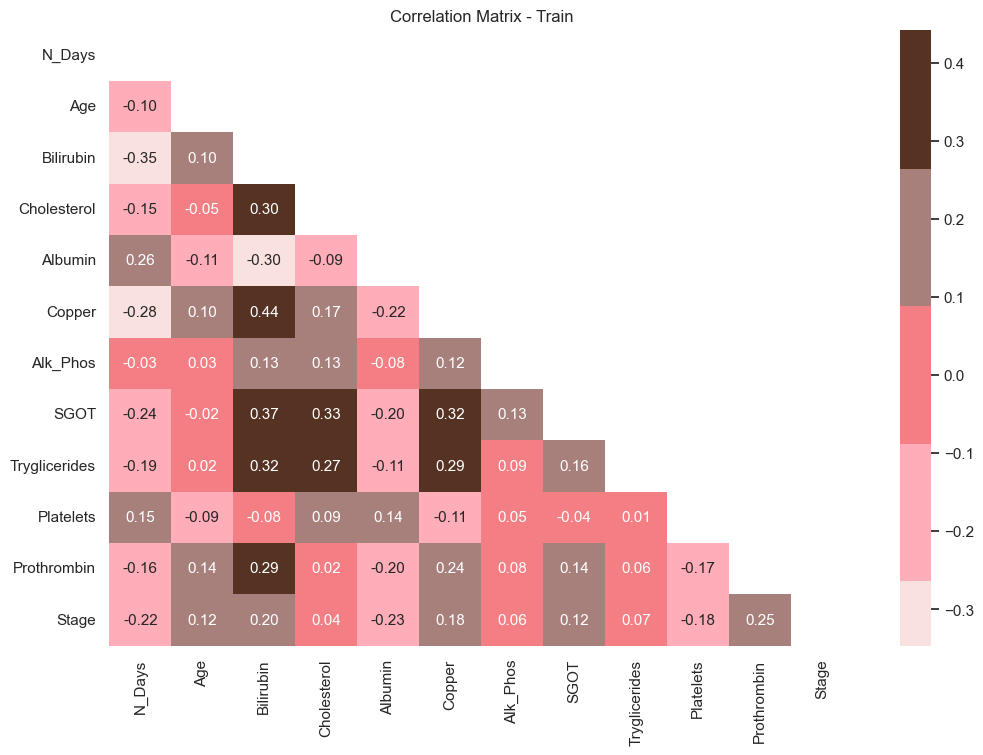

In [77]:
corr_matrix = train_df.select_dtypes(include='number').corr()
data_mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
f, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = custom_colors, fmt = '.2f', center = 0,
            annot_kws = {'size': 11}, mask = data_mask).set_title('Correlation Matrix - Train');
plt.show()

In [78]:
cat_cols


Index(['Drug', 'gender', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Status'],
      dtype='object')

In [79]:
num_cols

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [80]:
from sklearn.model_selection import train_test_split


In [81]:
df_train, df_val = train_test_split(train_df, test_size=0.25, random_state=1)

In [82]:
len(df_train), len(df_val), len(test_df)


(5928, 1977, 5271)

In [83]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = test_df.reset_index(drop=True)

In [84]:
df_train.Status

0        C
1        C
2        C
3       CL
4        C
        ..
5923     D
5924     D
5925    CL
5926     C
5927     C
Name: Status, Length: 5928, dtype: object

In [85]:
y_train = df_train.Status.values
y_val = df_val.Status.values
y_test = test_df.Status.values

AttributeError: 'DataFrame' object has no attribute 'Status'

In [ ]:


del df_train['Status']
del df_val['Status']
del test_df['Status']

KeyError: 'Status'